# Proyecto semestral "Suicide rates and economy indicators"
## Integrantes:
- Javier Bravo
- Robert Reyes
- Nicolás Jara


In [ ]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 10.3 MB/s eta 0:00:00


In [ ]:
from dabl.plot import discrete_scatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/mineria/suicide_rates_1990-2022.csv')
df.columns.values

Mounted at /content/drive


array(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year',
       'Sex', 'AgeGroup', 'Generation', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population',
       'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio'], dtype=object)

In [ ]:
df[['Generation','SuicideCount','CauseSpecificDeathPercentage','DeathRatePer100K','Population']].describe()

,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population
count,118096.000000,114271.000000,107896.000000,1.126400e+05
mean,63.632037,3.873690,12.299791,2.456184e+07
std,254.095408,7.317820,21.016170,4.531156e+07
min,0.000000,0.000000,0.000000,4.054200e+04
25%,0.000000,0.000000,0.000000,2.613805e+06
50%,4.000000,0.586166,4.452366,6.888434e+06
75%,32.000000,4.355646,15.384615,2.533364e+07
max,6787.000000,100.000000,502.512563,3.320316e+08


In [ ]:
df.describe(include='all')

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560,118560,118560,118560,118560.000000,118560,118560,118560,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
unique,6,6,117,117,NaN,3,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EU,Europe,ARG,Argentina,NaN,Male,0-14 years,Generation Alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,45140,45140,1740,1740,NaN,58320,23712,23712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2005.740047,NaN,NaN,NaN,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,NaN,NaN,NaN,NaN,8.745003,NaN,NaN,NaN,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,NaN,NaN,NaN,NaN,1990.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,NaN,NaN,NaN,NaN,1999.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN,NaN,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250


In [ ]:
df[['GDP','GDPPerCapita','GrossNationalIncome','GNIPerCapita','InflationRate','EmploymentPopulationRatio']].describe()

,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [ ]:
df.dropna(inplace=True)
df.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000.000000,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
mean,2006.773539,77.411483,4.235280,12.283169,2.617398e+07,5.560291e+11,19041.165988,5.555825e+11,23524.842584,17.961184,56.241710
std,8.292090,282.711572,7.538699,20.480970,4.723852e+07,1.789410e+12,20336.785357,1.808001e+12,19571.799280,160.867397,7.957209
min,1991.000000,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,2000.000000,0.000000,0.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.498961,51.269000
50%,2007.000000,7.000000,0.748497,4.730081,7.336600e+06,7.802747e+10,10877.112360,7.339227e+10,17980.000000,2.975071,56.786000
75%,2014.000000,42.000000,5.052988,15.450719,2.880618e+07,3.374560e+11,28185.321370,3.324440e+11,32320.000000,6.367738,60.846000
max,2022.000000,6787.000000,100.000000,338.573156,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


# Graficos de Distribucion, Dispersion y Boxplot


## InflationRate

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


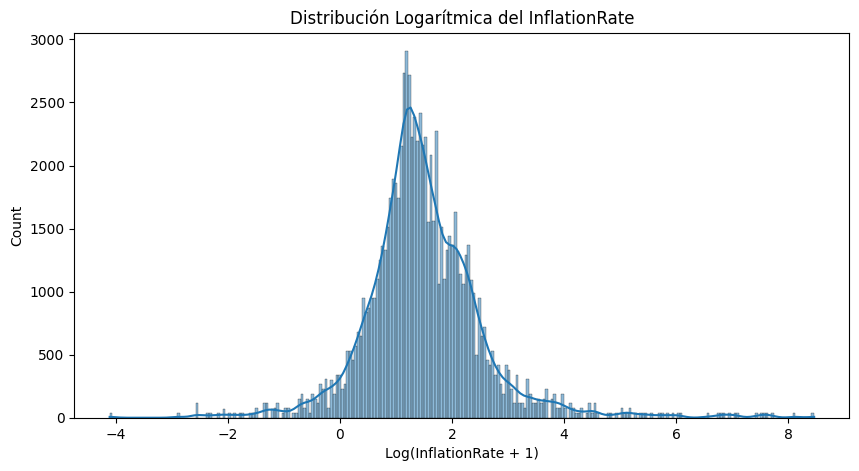

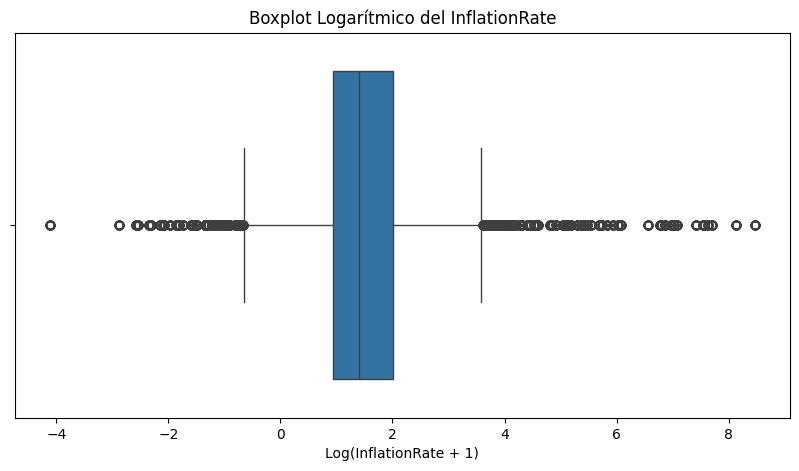

In [ ]:
# Aplicar la transformación logarítmica (asegurándonos de que no haya valores <= 0)
df['InflationRate_log'] = np.log1p(df['InflationRate'])  # log1p permite log(1 + x), útil si hay ceros

# Histograma para la distribución de la variable InflationRate con transformación logarítmica
plt.figure(figsize=(10, 5))
sns.histplot(df['InflationRate_log'], kde=True)
plt.title('Distribución Logarítmica del InflationRate')
plt.xlabel('Log(InflationRate + 1)')
plt.show()

print('\n')

# Gráfico de caja (boxplot) para la distribución logarítmica
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['InflationRate_log'])
plt.title('Boxplot Logarítmico del InflationRate')
plt.xlabel('Log(InflationRate + 1)')
plt.show()


### DeathRatePer100k

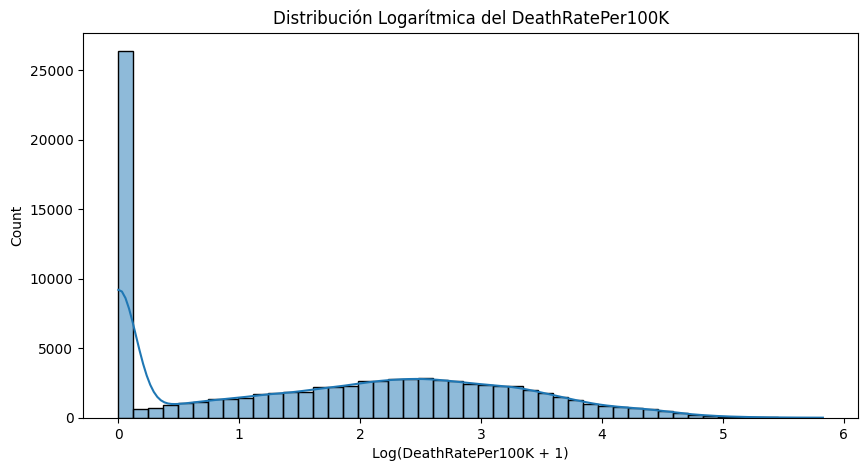

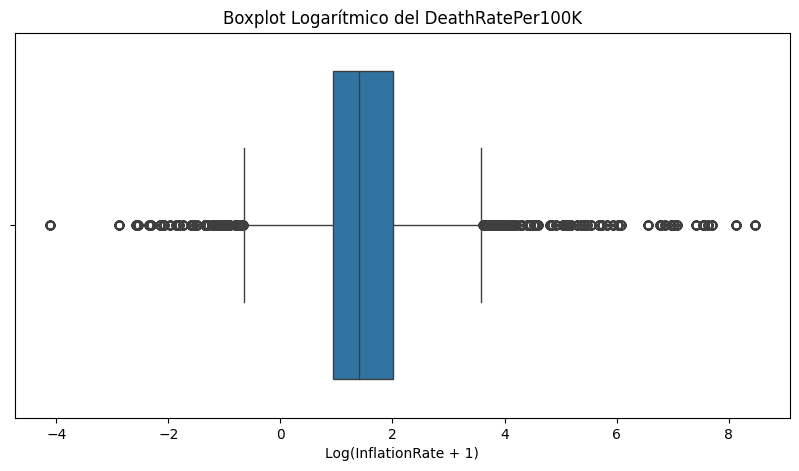

In [ ]:
# Aplicar la transformación logarítmica (asegurándonos de que no haya valores <= 0)
df['DeathRatePer100K_log'] = np.log1p(df['DeathRatePer100K'])  # log1p permite log(1 + x), útil si hay ceros

# Histograma para la distribución de la variable InflationRate con transformación logarítmica
plt.figure(figsize=(10, 5))
sns.histplot(df['DeathRatePer100K_log'], kde=True)
plt.title('Distribución Logarítmica del DeathRatePer100K')
plt.xlabel('Log(DeathRatePer100K + 1)')
plt.show()

print('\n')

# Gráfico de caja (boxplot) para la distribución logarítmica
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['InflationRate_log'])
plt.title('Boxplot Logarítmico del DeathRatePer100K')
plt.xlabel('Log(InflationRate + 1)')
plt.show()

### Inflation vs DeathRatePer100k

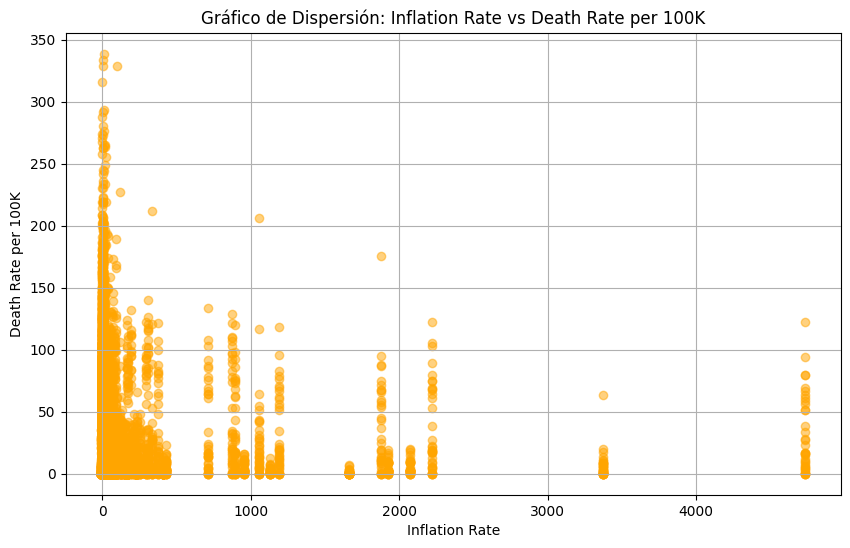

In [ ]:
# Gráfico de dispersión de InflationRate vs DeathRatePer100K
plt.figure(figsize=(10, 6))
plt.scatter(df['InflationRate'], df['DeathRatePer100K'], alpha=0.5, color='orange')

# Ejes y el título del gráfico
plt.title('Gráfico de Dispersión: Inflation Rate vs Death Rate per 100K')
plt.xlabel('Inflation Rate')
plt.ylabel('Death Rate per 100K')
plt.grid(True)
plt.show()

### GDPPercapita vs DeatRatePer100k

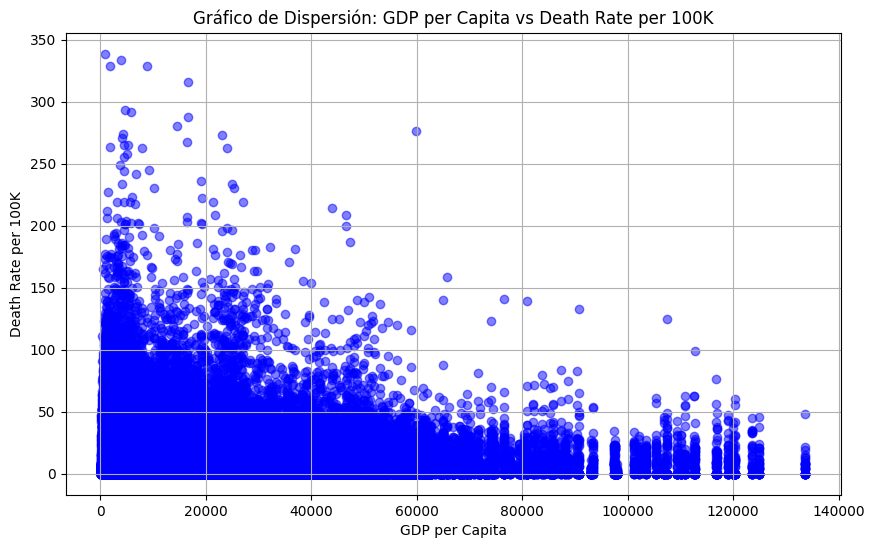

In [ ]:
# Ejemplo de visualización del gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['GDPPerCapita'], df['DeathRatePer100K'], alpha=0.5, color='b')

# Configuramos los ejes y el título del gráfico
plt.title('Gráfico de Dispersión: GDP per Capita vs Death Rate per 100K')
plt.xlabel('GDP per Capita')
plt.ylabel('Death Rate per 100K')
plt.grid(True)
plt.show()

# **Analisis PCA y Factorial**

In [ ]:
# Limpiamos dataset de las columnas que no entregan valores numéricos
df = df.drop("CountryCode", axis=1)
df = df.drop("RegionCode", axis=1)
df = df.drop("Generation", axis=1)
df = df.drop("CauseSpecificDeathPercentage", axis=1)

In [ ]:
df.columns.values

array(['RegionName', 'CountryName', 'Year', 'Sex', 'AgeGroup',
       'SuicideCount', 'DeathRatePer100K', 'Population', 'GDP',
       'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'InflationRate_log',
       'DeathRatePer100K_log'], dtype=object)

In [ ]:
# Columnas a mantener relacionadas con la tasa de suicidio
cols_to_keep = [
    "RegionName", "CountryName", "Year", "Sex", "AgeGroup",
    "SuicideCount", "DeathRatePer100K", "Population", "GDP",
    "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"
]

# Seleccionar solo las columnas relevantes
df = df[cols_to_keep]

# Mostrar las primeras filas del DataFrame resultante
df.head(10)


,RegionName,CountryName,Year,Sex,AgeGroup,SuicideCount,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,Europe,Albania,1992,Male,15-24 years,5.0,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
5,Europe,Albania,1992,Male,15-24 years,4.0,3.276003,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
6,Europe,Albania,1992,Male,25-34 years,3.0,2.487562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
7,Europe,Albania,1992,Male,25-34 years,4.0,3.202562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
8,Europe,Albania,1992,Male,35-54 years,1.0,0.915751,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
9,Europe,Albania,1992,Male,35-54 years,3.0,3.428571,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [ ]:
print(df.dtypes)

RegionName                    object
CountryName                   object
Year                           int64
Sex                           object
AgeGroup                      object
SuicideCount                 float64
DeathRatePer100K             float64
Population                   float64
GDP                          float64
GDPPerCapita                 float64
GrossNationalIncome          float64
GNIPerCapita                 float64
InflationRate                float64
EmploymentPopulationRatio    float64
dtype: object


In [ ]:
# Eliminar filas con valores faltantes en cualquier columna
df.dropna(inplace=True)

# Mostrar las primeras filas del DataFrame resultante
df.head(100)

,RegionName,CountryName,Year,Sex,AgeGroup,SuicideCount,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
3,Europe,Albania,1992,Male,0-14 years,0.0,0.000000,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
4,Europe,Albania,1992,Male,15-24 years,5.0,3.531073,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Europe,Albania,1994,Female,0-14 years,0.0,0.000000,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
101,Europe,Albania,1994,Female,0-14 years,0.0,0.000000,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
102,Europe,Albania,1994,Female,0-14 years,0.0,0.000000,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
103,Europe,Albania,1994,Female,0-14 years,0.0,0.000000,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [ ]:
# Definir las columnas independientes (variables que afectan la tasa de suicidio)
col_ind = [
    "Year", "SuicideCount", "Population", "GDP",
    "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"
]
df_ind = df[col_ind]  # Crear DataFrame de variables independientes

# Definir la columna dependiente (Health_Risk_Score)
col_dep = ['DeathRatePer100K']
df_dep = df[col_dep]  # Crear DataFrame de la variable dependiente

# Mostrar las primeras filas para verificar
print(df_ind.head())
print(df_dep.head())


   Year  SuicideCount  Population          GDP  GDPPerCapita  \
0  1992           0.0   3247039.0  652174990.8     200.85222   
1  1992           0.0   3247039.0  652174990.8     200.85222   
2  1992           0.0   3247039.0  652174990.8     200.85222   
3  1992           0.0   3247039.0  652174990.8     200.85222   
4  1992           5.0   3247039.0  652174990.8     200.85222   

   GrossNationalIncome  GNIPerCapita  InflationRate  EmploymentPopulationRatio  
0          906184212.3        1740.0     226.005421                     45.315  
1          906184212.3        1740.0     226.005421                     45.315  
2          906184212.3        1740.0     226.005421                     45.315  
3          906184212.3        1740.0     226.005421                     45.315  
4          906184212.3        1740.0     226.005421                     45.315  
   DeathRatePer100K
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          3.531073


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar las variables independientes
scaler = StandardScaler()
df_ind_scaled = scaler.fit_transform(df_ind.values)

# Entrenar PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(df_ind_scaled)  # Ajustar PCA a los datos escalados


PCA(n_components=2)

In [ ]:
# Transformar los datos
transformada = pca.transform(df_ind_scaled)  # Aplicar PCA a los datos escalados

# Mostrar la forma de los datos transformados
print("Forma original (df_ind_scaled):", df_ind_scaled.shape)
print("Forma después de PCA (transformada):", transformada.shape)

# Primeras filas de los datos transformados
import pandas as pd
print("Primeras filas de la transformación PCA:")
print(pd.DataFrame(transformada, columns=['PC1', 'PC2']).head(10))

Forma original (df_ind_scaled): (89000, 9)
Forma después de PCA (transformada): (89000, 2)
Primeras filas de la transformación PCA:
        PC1       PC2
0 -1.554942 -2.023153
1 -1.554942 -2.023153
2 -1.554942 -2.023153
3 -1.554942 -2.023153
4 -1.549203 -2.027223
5 -1.550350 -2.026409
6 -1.551498 -2.025595
7 -1.550350 -2.026409
8 -1.553794 -2.023967
9 -1.551498 -2.025595


In [ ]:
# Comparar las estructuras
print(df_ind_scaled.shape)
print(transformada.shape)

(89000, 9)
(89000, 2)


In [ ]:
# Calcular la mediana de la columna 'DeathRatePer100K'
median_death_rate = df['DeathRatePer100K'].median()

# Imprimir la mediana
print(f"La mediana de la columna 'DeathRatePer100K' es: {median_death_rate}")

La mediana de la columna 'DeathRatePer100K' es: 4.73008131


In [ ]:
# Crear la columna 'Salida' inicializada en None
df['Salida'] = None

# Asignar 1 a 'Salida' para los casos donde 'DeathRatePer100K' es mayor o igual a 4,7
df.loc[df['DeathRatePer100K'] >= 4.7, 'Salida'] = 1

# Asignar 0 a 'Salida' para los casos donde 'DeathRatePer100K' es menor a 4,7
df.loc[df['DeathRatePer100K'] < 4.7, 'Salida'] = 0

# Contar los valores de la columna 'Salida'
salida_counts = df['Salida'].value_counts()
print(salida_counts)


Salida
1    44597
0    44403
Name: count, dtype: int64


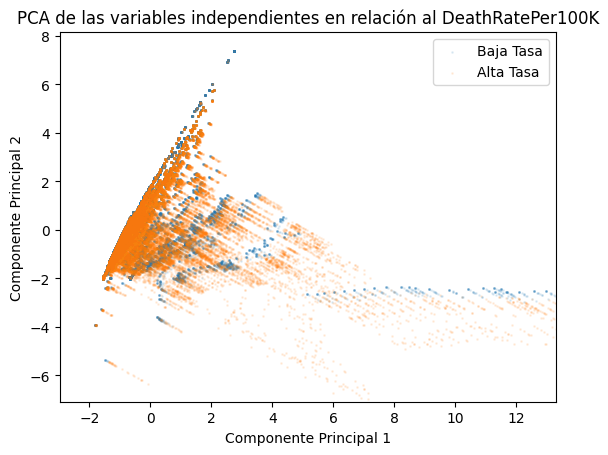

In [ ]:
# Graficar la transformación PCA con los colores basados en la columna 'Salida'
discrete_scatter(x=transformada[:, 0], y=transformada[:, 1], c=df['Salida'].values, unique_c=[0, 1])

# Agregar leyenda, etiquetas y título
plt.legend(['Baja Tasa', 'Alta Tasa'], loc='best')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las variables independientes en relación al DeathRatePer100K')
plt.show()


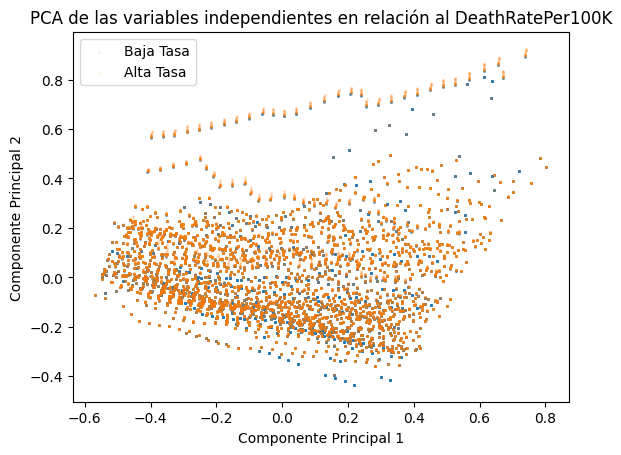

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalar información
escala = MinMaxScaler()
escala.fit(df_ind_scaled)
escalada = escala.transform(df_ind_scaled)

# Entrenar PCA con la data escalada
pca.fit(escalada)

# Transformar la información mediante PCA
transformada = pca.transform(escalada)

# Graficar la transformación PCA con los colores basados en la columna 'Salida'
discrete_scatter(x=transformada[:,0], y=transformada[:,1], c=df['Salida'].values, unique_c=[0, 1])

# Agregar leyenda, etiquetas y título
plt.legend(['Baja Tasa', 'Alta Tasa'], loc='best')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las variables independientes en relación al DeathRatePer100K')
plt.show()


In [ ]:
!pip install factor_analyzer --upgrade

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

In [ ]:
# Crear DataFrame seleccionando columnas del dataset original
df_deathrate = df[["DeathRatePer100K", "Year", "SuicideCount", "Population", "GDP",
                   "GDPPerCapita", "GrossNationalIncome", "GNIPerCapita", "InflationRate", "EmploymentPopulationRatio"]]

# Convertir todas las columnas a numéricas, manejando posibles errores
df_deathrate = df_deathrate.apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar la conversión
df_deathrate.head()


,DeathRatePer100K,Year,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,0.000000,1992,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,0.000000,1992,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,0.000000,1992,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,0.000000,1992,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,3.531073,1992,5.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [ ]:
df_deathrate.describe()

,DeathRatePer100K,Year,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
mean,12.283169,2006.773539,77.411483,2.617398e+07,5.560291e+11,19041.165988,5.555825e+11,23524.842584,17.961184,56.241710
std,20.480970,8.292090,282.711572,4.723852e+07,1.789410e+12,20336.785357,1.808001e+12,19571.799280,160.867397,7.957209
min,0.000000,1991.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,0.000000,2000.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.498961,51.269000
50%,4.730081,2007.000000,7.000000,7.336600e+06,7.802747e+10,10877.112360,7.339227e+10,17980.000000,2.975071,56.786000
75%,15.450719,2014.000000,42.000000,2.880618e+07,3.374560e+11,28185.321370,3.324440e+11,32320.000000,6.367738,60.846000
max,338.573156,2022.000000,6787.000000,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [ ]:
# p_value < 0.05 - OK
chi_square_value, p_value = calculate_bartlett_sphericity(df_deathrate)
chi_square_value, p_value

(881515.1146771095, 0.0)

In [ ]:
kmo_all, kmo_model = calculate_kmo(df_deathrate)
kmo_model

0.6838716015685551

In [ ]:
fa = FactorAnalyzer()
fa.fit(df_deathrate)

NameError: name 'FactorAnalyzer' is not defined

In [ ]:
fa.get_communalities()

array([0.11289704, 0.12106878, 0.88729904, 0.67099618, 1.01016897,
       0.74923406, 1.00795229, 1.08365342, 0.01209709, 0.1349152 ])

In [ ]:
ev, v = fa.get_eigenvalues()

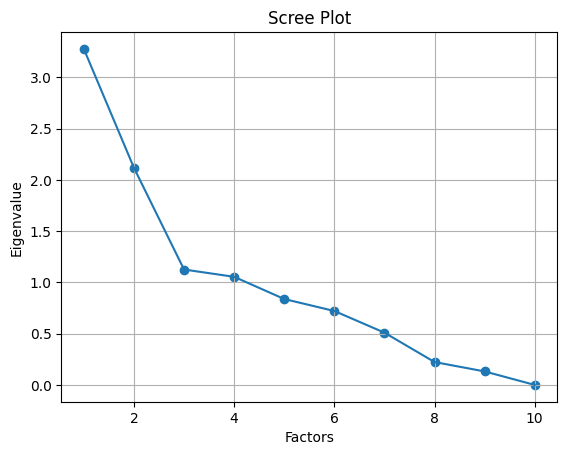

In [ ]:
plt.scatter(range(1,df_deathrate.shape[1]+1),ev)
plt.plot(range(1,df_deathrate.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
factores = 5
fa = FactorAnalyzer(factores, rotation="varimax")
fa.fit(df_deathrate)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [ ]:
arr = []
n = 0
for pesos in fa.loadings_:
  # Aqui se utiliza df_deathrate.columns para acceder a los nombres de las columnas en lugar de feature_names.
  name = df_deathrate.columns[n]
  n += 1
  arr.append([name]+list(pesos))
df_factores = pd.DataFrame(arr, columns = ['Columnas']+['Factor'+str(i) for i in range(1,factores+1)])
df_factores

,Columnas,Factor1,Factor2,Factor3,Factor4,Factor5
0,DeathRatePer100K,0.050998,-0.053150,0.992536,-0.067212,-0.002830
1,Year,0.021711,0.229487,-0.044387,0.481437,0.083786
2,SuicideCount,0.532229,0.024774,0.253871,-0.093682,0.197741
3,Population,0.888053,-0.017740,-0.039090,-0.068078,0.298010
4,GDP,0.965066,0.133326,-0.014687,0.085711,-0.200406
5,GDPPerCapita,0.140632,0.802952,0.058660,0.231728,-0.121490
6,GrossNationalIncome,0.964274,0.131429,-0.014199,0.087463,-0.204000
7,GNIPerCapita,0.081247,0.947867,0.035424,0.312243,-0.021246
8,InflationRate,0.008995,-0.007238,0.010199,-0.283642,0.041807
9,EmploymentPopulationRatio,0.006455,0.409053,-0.074642,-0.049741,0.056117


In [ ]:
ruta = '/content/drive/My Drive/'

In [ ]:
df_factores.to_excel(ruta + 'TasaSuicidio.xlsx')

In [ ]:
# Mostrar las cargas factoriales
factor_loadings = fa.loadings_
print("\nCargas factoriales (Factor Loadings):")
print(pd.DataFrame(factor_loadings, index=df_deathrate.columns))

# Obtener las comunalidades
communalities = fa.get_communalities()
print("\nComunalidades:")
print(communalities)


Cargas factoriales (Factor Loadings):
                                  0         1         2         3         4
DeathRatePer100K           0.050998 -0.053150  0.992536 -0.067212 -0.002830
Year                       0.021711  0.229487 -0.044387  0.481437  0.083786
SuicideCount               0.532229  0.024774  0.253871 -0.093682  0.197741
Population                 0.888053 -0.017740 -0.039090 -0.068078  0.298010
GDP                        0.965066  0.133326 -0.014687  0.085711 -0.200406
GDPPerCapita               0.140632  0.802952  0.058660  0.231728 -0.121490
GrossNationalIncome        0.964274  0.131429 -0.014199  0.087463 -0.204000
GNIPerCapita               0.081247  0.947867  0.035424  0.312243 -0.021246
InflationRate              0.008995 -0.007238  0.010199 -0.283642  0.041807
EmploymentPopulationRatio  0.006455  0.409053 -0.074642 -0.049741  0.056117

Comunalidades:
[0.99507869 0.29390727 0.39620959 0.88392612 0.99685368 0.73640739
 0.99656603 1.00425602 0.08243788 0.178560

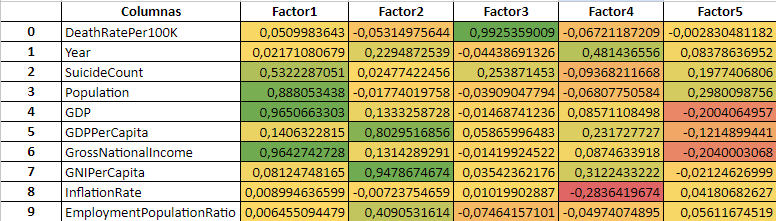

# Series de tiempo

In [ ]:
import datetime as dt
import statsmodels.api as sm

In [ ]:
df_1 = pd.read_csv('/content/drive/Shareddrives/mineria/suicide_rates_1990-2022.csv')
df_1.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [ ]:
# Identificar filas con al menos una columna vacía
filas_limpias = df_1[df_1.isnull().any(axis=1)]
num_filas_limpias = len(filas_limpias)

# Imprimir número de filas con valores faltantes
print(f"Número de filas con al menos una columna vacía: {num_filas_limpias}")

# Eliminar filas con valores faltantes
df_1 = df_1.dropna()

# Mostrar estadísticas descriptivas del DataFrame limpio
df_1.describe()

Número de filas con al menos una columna vacía: 29560


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000.000000,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
mean,2006.773539,77.411483,4.235280,12.283169,2.617398e+07,5.560291e+11,19041.165988,5.555825e+11,23524.842584,17.961184,56.241710
std,8.292090,282.711572,7.538699,20.480970,4.723852e+07,1.789410e+12,20336.785357,1.808001e+12,19571.799280,160.867397,7.957209
min,1991.000000,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,2000.000000,0.000000,0.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.498961,51.269000
50%,2007.000000,7.000000,0.748497,4.730081,7.336600e+06,7.802747e+10,10877.112360,7.339227e+10,17980.000000,2.975071,56.786000
75%,2014.000000,42.000000,5.052988,15.450719,2.880618e+07,3.374560e+11,28185.321370,3.324440e+11,32320.000000,6.367738,60.846000
max,2022.000000,6787.000000,100.000000,338.573156,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [ ]:
num_filas = len(df_1)
print(f"El número de filas es: {num_filas}")

El número de filas es: 89000


In [ ]:
# Filtrar datos del año 2010 al 2020
df_1_filtered = df_1[(df_1['Year'] >= 2010) & (df_1['Year'] <= 2020)]
print(df_1_filtered.head())

    RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
720         EU     Europe         ALB     Albania  2010  Male   0-14 years   
721         EU     Europe         ALB     Albania  2010  Male   0-14 years   
722         EU     Europe         ALB     Albania  2010  Male   0-14 years   
723         EU     Europe         ALB     Albania  2010  Male   0-14 years   
724         EU     Europe         ALB     Albania  2010  Male  15-24 years   

           Generation  SuicideCount  CauseSpecificDeathPercentage  \
720  Generation Alpha           0.0                      0.000000   
721  Generation Alpha           0.0                      0.000000   
722  Generation Alpha           0.0                      0.000000   
723  Generation Alpha           0.0                      0.000000   
724      Generation Z           2.0                      3.076923   

     DeathRatePer100K  Population           GDP  GDPPerCapita  \
720          0.000000   2913021.0  1.192693e+10   4

In [ ]:
# Tasa promedio de suicidios por país
suicide_avg_country = df_1.groupby('CountryName')['DeathRatePer100K'].mean().sort_values(ascending=False)
print(suicide_avg_country.head(10))


CountryName
Lithuania             36.389933
Belarus               32.465801
Hungary               31.970388
Russian Federation    31.725758
Republic of Korea     30.302362
Sri Lanka             27.440017
Kazakhstan            27.047966
Slovenia              26.930132
Ukraine               26.333608
Latvia                26.207223
Name: DeathRatePer100K, dtype: float64


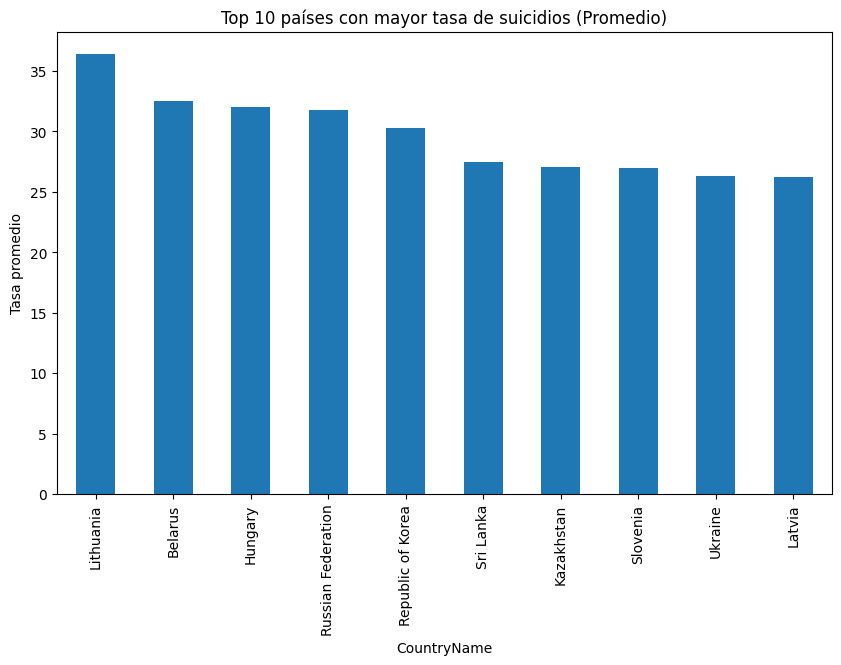

In [ ]:
# Graficar tasa de suicidios promedio de los 10 países con mayor tasa
top_10_countries = suicide_avg_country.head(10)
top_10_countries.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 países con mayor tasa de suicidios (Promedio)')
plt.ylabel('Tasa promedio')
plt.show()

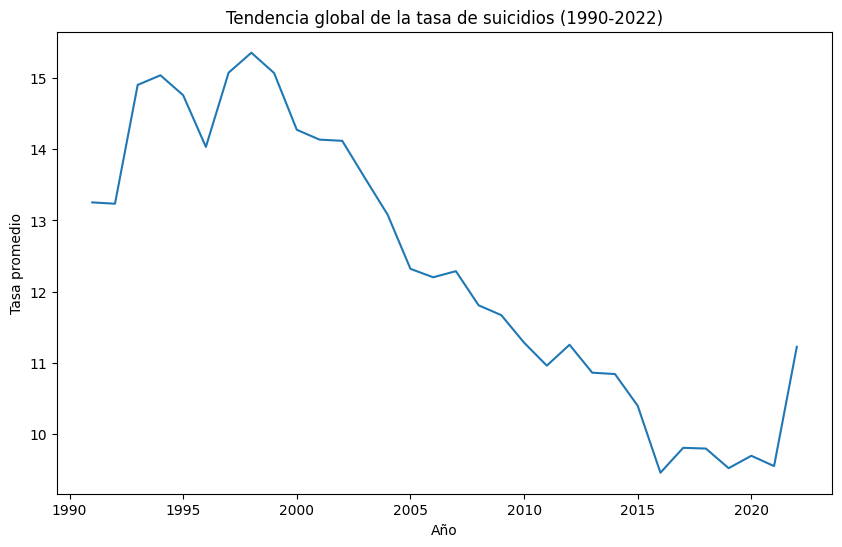

In [ ]:
# Promedio anual de tasa de suicidios a nivel global
global_trend = df_1.groupby('Year')['DeathRatePer100K'].mean()

# Graficar la tendencia global
global_trend.plot(figsize=(10, 6))
plt.title('Tendencia global de la tasa de suicidios (1990-2022)')
plt.ylabel('Tasa promedio')
plt.xlabel('Año')
plt.show()

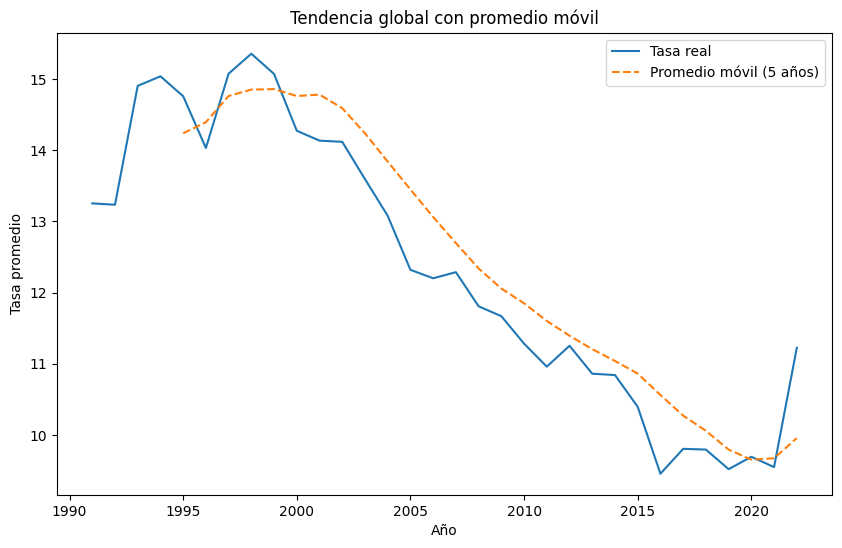

In [ ]:
# Promedios móviles (ventana de 5 años)
global_trend_ma = global_trend.rolling(window=5).mean()

# Graficar con promedio móvil
plt.figure(figsize=(10, 6))
plt.plot(global_trend, label='Tasa real')
plt.plot(global_trend_ma, label='Promedio móvil (5 años)', linestyle='--')
plt.title('Tendencia global con promedio móvil')
plt.xlabel('Año')
plt.ylabel('Tasa promedio')
plt.legend()
plt.show()

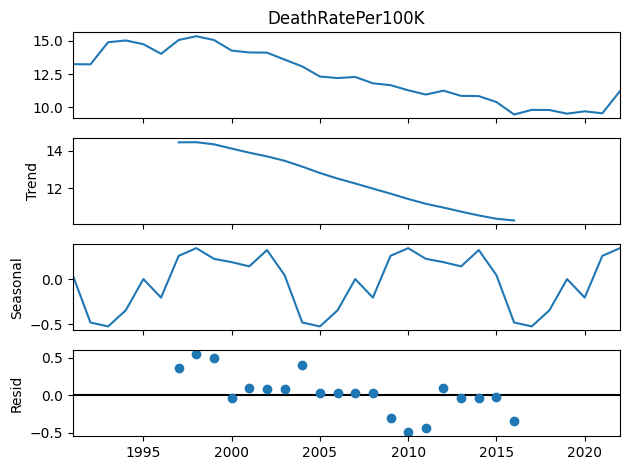

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie global
descomposicion = seasonal_decompose(global_trend, model='additive', period=12)
descomposicion.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


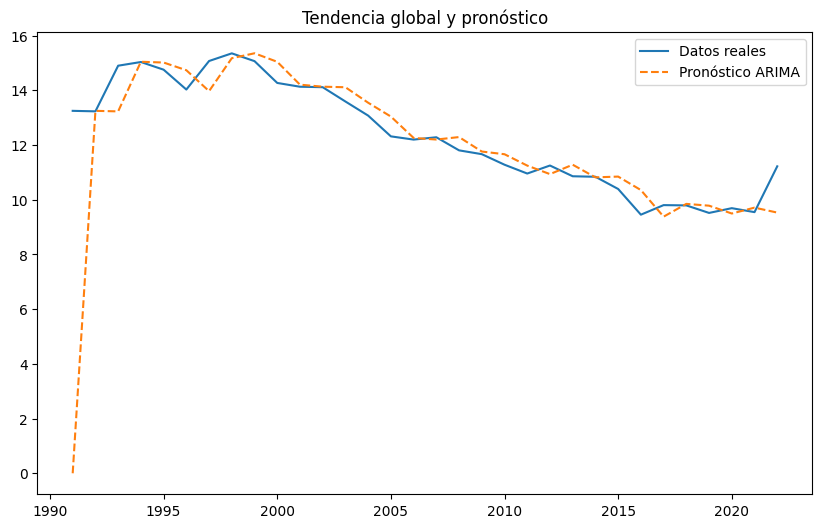

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA
modelo = ARIMA(global_trend, order=(1, 1, 1))
resultados = modelo.fit()

# Agregar pronósticos al gráfico
plt.figure(figsize=(10, 6))
plt.plot(global_trend, label='Datos reales')
plt.plot(resultados.fittedvalues, label='Pronóstico ARIMA', linestyle='--')
plt.title('Tendencia global y pronóstico')
plt.legend()
plt.show()


# Tratamiento de outliers antes del entrenamiento

In [ ]:
df_1 = pd.read_csv('/content/drive/Shareddrives/mineria/suicide_rates_1990-2022.csv')
df_1.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/mineria/suicide_rates_1990-2022.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_1.dropna(inplace=True)
df_1.describe(include="all")

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000,89000,89000,89000,89000.000000,89000,89000,89000,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
unique,6,6,101,101,NaN,2,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EU,Europe,SWE,Sweden,NaN,Male,55-74 years,Baby Boomers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38272,38272,1216,1216,NaN,44529,18792,18792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2006.773539,NaN,NaN,NaN,77.411483,4.235280,12.283169,2.617398e+07,5.560291e+11,19041.165988,5.555825e+11,23524.842584,17.961184,56.241710
std,NaN,NaN,NaN,NaN,8.292090,NaN,NaN,NaN,282.711572,7.538699,20.480970,4.723852e+07,1.789410e+12,20336.785357,1.808001e+12,19571.799280,160.867397,7.957209
min,NaN,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.498961,51.269000
50%,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,7.000000,0.748497,4.730081,7.336600e+06,7.802747e+10,10877.112360,7.339227e+10,17980.000000,2.975071,56.786000
75%,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,42.000000,5.052988,15.450719,2.880618e+07,3.374560e+11,28185.321370,3.324440e+11,32320.000000,6.367738,60.846000


## Detección de outliers

In [ ]:
# Función para detectar outliers utilizando el rango intercuartílico (IQR)
def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, col_outliers])

    return outliers.drop_duplicates()

# Detectar outliers en todas las columnas numéricas
numeric_cols = df_1.select_dtypes(include=['int64', 'float64']).columns
outliers = detect_outliers(df_1, numeric_cols)

print(f"Se han detectado {len(outliers)} outliers en el dataframe.")

Se han detectado 36814 outliers en el dataframe.


## Tratamiento de outliers usando la mediana

In [ ]:
# Función para detectar outliers y reemplazarlos por la mediana
def recover_outliers(df, threshold=1.5):
    # Crear un DataFrame para almacenar los valores recuperados
    recovered_df = df.copy()  # Asegurarse de que sea una copia independiente

    # Para cada columna numérica, calcular los límites y detectar outliers
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calcular cuartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites para detectar outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Detectar outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Reemplazar outliers por la mediana de la columna
        median_value = df[col].median()
        recovered_df.loc[outliers, col] = median_value

    return recovered_df

# Supongamos que df es tu DataFrame original
# df_recovered contendrá los datos con outliers recuperados
df_recovered = recover_outliers(df_1)

In [ ]:
df_recovered.describe(include="all")

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000,89000,89000,89000,89000.000000,89000,89000,89000,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
unique,6,6,101,101,NaN,2,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EU,Europe,SWE,Sweden,NaN,Male,55-74 years,Baby Boomers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38272,38272,1216,1216,NaN,44529,18792,18792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2006.773539,NaN,NaN,NaN,14.295798,1.854509,7.348479,1.252421e+07,1.248009e+11,16598.734439,1.225376e+11,20995.980787,3.440014,56.186506
std,NaN,NaN,NaN,NaN,8.292090,NaN,NaN,NaN,21.741238,2.882580,9.066251,1.603622e+07,1.602593e+11,15849.968201,1.602891e+11,14851.240777,2.971693,7.040318
min,NaN,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-4.863278,37.215000
25%,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.501527,51.703000
50%,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,7.000000,0.748493,4.729937,7.336600e+06,7.787132e+10,10877.112360,7.332487e+10,17980.000000,2.975071,56.786000
75%,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,17.000000,2.207419,10.996917,1.187156e+07,1.668060e+11,25623.941630,1.632330e+11,29420.000000,4.614733,60.567000


In [ ]:
df_1.describe(include="all")

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,89000,89000,89000,89000,89000.000000,89000,89000,89000,89000.000000,89000.000000,89000.000000,8.900000e+04,8.900000e+04,89000.000000,8.900000e+04,89000.000000,89000.000000,89000.000000
unique,6,6,101,101,NaN,2,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EU,Europe,SWE,Sweden,NaN,Male,55-74 years,Baby Boomers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38272,38272,1216,1216,NaN,44529,18792,18792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2006.773539,NaN,NaN,NaN,77.411483,4.235280,12.283169,2.617398e+07,5.560291e+11,19041.165988,5.555825e+11,23524.842584,17.961184,56.241710
std,NaN,NaN,NaN,NaN,8.292090,NaN,NaN,NaN,282.711572,7.538699,20.480970,4.723852e+07,1.789410e+12,20336.785357,1.808001e+12,19571.799280,160.867397,7.957209
min,NaN,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.043320e+05,3.160074e+08,157.063550,3.122460e+08,1080.000000,-8.525170,32.026000
25%,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.903198e+06,1.475151e+10,4072.489558,1.400577e+10,8860.000000,1.498961,51.269000
50%,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,7.000000,0.748497,4.730081,7.336600e+06,7.802747e+10,10877.112360,7.339227e+10,17980.000000,2.975071,56.786000
75%,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,42.000000,5.052988,15.450719,2.880618e+07,3.374560e+11,28185.321370,3.324440e+11,32320.000000,6.367738,60.846000


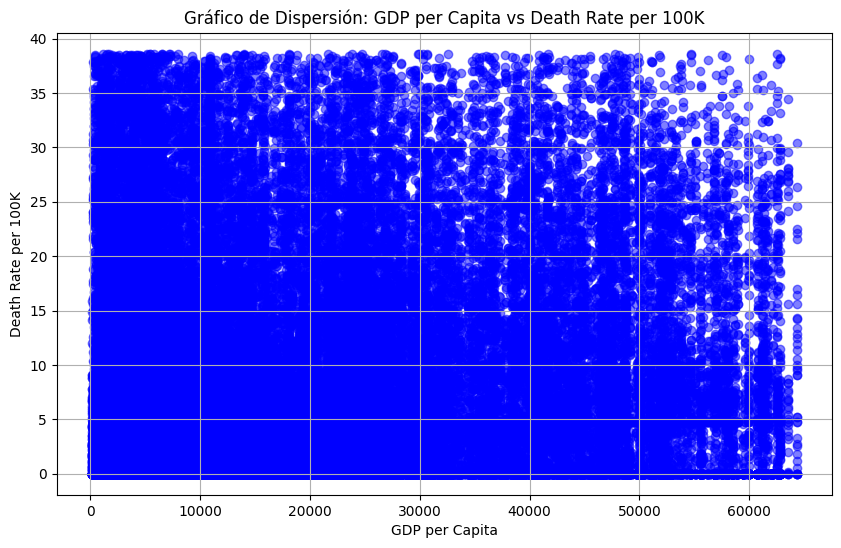

In [ ]:
# Ejemplo de visualización del gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_recovered['GDPPerCapita'], df_recovered['DeathRatePer100K'], alpha=0.5, color='b')

# Configuramos los ejes y el título del gráfico
plt.title('Gráfico de Dispersión: GDP per Capita vs Death Rate per 100K')
plt.xlabel('GDP per Capita')
plt.ylabel('Death Rate per 100K')
plt.grid(True)
plt.show()

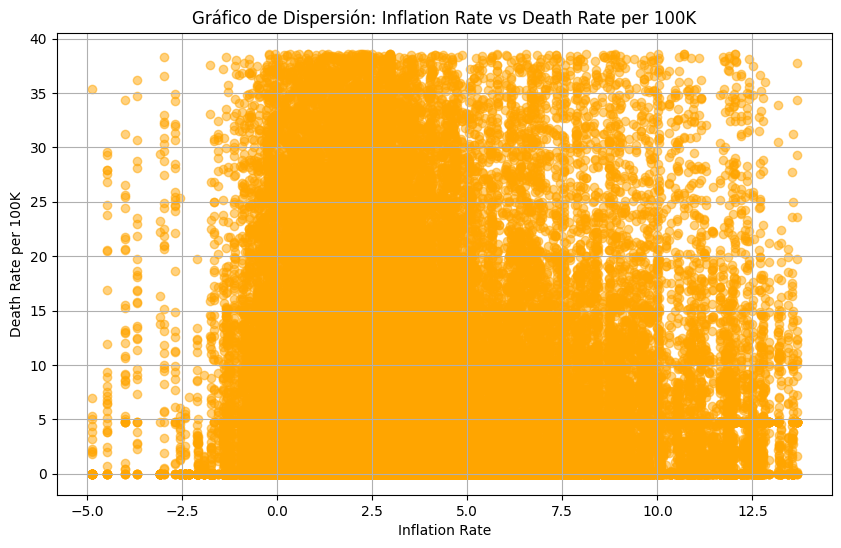

In [ ]:
# Gráfico de dispersión de InflationRate vs DeathRatePer100K
plt.figure(figsize=(10, 6))
plt.scatter(df_recovered['InflationRate'], df_recovered['DeathRatePer100K'], alpha=0.5, color='orange')

# Ejes y el título del gráfico
plt.title('Gráfico de Dispersión: Inflation Rate vs Death Rate per 100K')
plt.xlabel('Inflation Rate')
plt.ylabel('Death Rate per 100K')
plt.grid(True)
plt.show()

# Dividision de los datos para entrenar y validar el modelo

- df_modNer1: dataset con outliers
- df_modNer2: dataset outliers reemplazados por la mediana

In [ ]:
# Dividimos el DataFrame en dos subconjuntos de manera aleatoria

# Crear el DataFrame con el 97% de los datos
df_modNer1 = df_1.sample(frac=0.97, random_state=42)

# Crear el DataFrame con el 3% restante
df_valid1 = df_1.drop(df_modNer1.index)

# Verificar tamaños
print(f"Tamaño de df_modNer: {len(df_modNer1)}")
print(f"Tamaño de df_valid: {len(df_valid1)}")

Tamaño de df_modNer: 86330
Tamaño de df_valid: 2670


In [ ]:
# Dividimos el DataFrame en dos subconjuntos de manera aleatoria

# Crear el DataFrame con el 97% de los datos
df_modNer2 = df_recovered.sample(frac=0.97, random_state=42)

# Crear el DataFrame con el 3% restante
df_valid2 = df_recovered.drop(df_modNer2.index)

# Verificar tamaños
print(f"Tamaño de df_modNer: {len(df_modNer2)}")
print(f"Tamaño de df_valid: {len(df_valid2)}")

Tamaño de df_modNer: 86330
Tamaño de df_valid: 2670


In [ ]:
# Calcular la mediana de la columna 'DeathRatePer100K' en df_1
median_death_rate_with_outliers = df_1['DeathRatePer100K'].median()

# Imprimir la mediana
print(f"La mediana de la columna 'DeathRatePer100K' es: {median_death_rate}")

La mediana de la columna 'DeathRatePer100K' es: 4.73008131


In [ ]:
# Calcular la mediana de la columna 'DeathRatePer100K' en df_recovered
median_death_rate_without_outliers = df_recovered['DeathRatePer100K'].median()

# Imprimir la mediana
print(f"La mediana de la columna 'DeathRatePer100K' es: {median_death_rate}")

La mediana de la columna 'DeathRatePer100K' es: 4.72993748


## Modelo Reyes bayesianas sin tratar outliers

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Selección de características y etiquetas
X = df_modNer1[['GDPPerCapita', 'InflationRate','GNIPerCapita','Population','Year']]
y = df_modNer1['DeathRatePer100K'].apply(lambda x: 1 if x > 0 else 0) # Binarización

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo BernoulliNB
bayes_model = BernoulliNB()
bayes_model.fit(X_train, y_train)

# Predicción y evaluación
bayes_predictions = bayes_model.predict(X_test)
bayes_accuracy = accuracy_score(y_test, bayes_predictions)
print(f'Precisión de la Red Bayesiana (BernoulliNB): {bayes_accuracy * 100:.2f}%')

median_value = 4.73
# Calcular la curva ROC
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, bayes_predictions)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

Precisión de la Red Bayesiana (BernoulliNB): 71.06%


## Modelo Reyes bayesianas con tratar outliers

In [ ]:
# Selección de características y etiquetas
X = df_modNer2[['GDPPerCapita', 'InflationRate','GNIPerCapita','Population','Year']]
y = df_modNer2['DeathRatePer100K'].apply(lambda x: 1 if x > 0 else 0) # Binarización

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo BernoulliNB
bayes_model = BernoulliNB()
bayes_model.fit(X_train, y_train)

# Predicción y evaluación
bayes_predictions = bayes_model.predict(X_test)
bayes_accuracy = accuracy_score(y_test, bayes_predictions)
print(f'Precisión de la Red Bayesiana (BernoulliNB): {bayes_accuracy * 100:.2f}%')

Precisión de la Red Bayesiana (BernoulliNB): 71.06%


## Modelo con redes neuronales

AL instalar las dependencias de tensorflow le pedira reiniciar la sesión para que surtan efecto

In [ ]:
!pip3 install tensorflow==2.9.0


**Desinstalar numpy e instalar la version 1.26 en caso de que el modelo de error de compilacion**

In [ ]:
!pip3 uninstall numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip3 install numpy==1.26


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow-datasets 4.9.7 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.9.0 which is incompatible.


### Modelo utilizando outliers
Las redes neuronales estan conformadas con 3 capas de neuronas, de 128, 64 y 32 nueronas, utilizando un dropout del 30% y una funcion de activacion de tipo lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Separar las variables dependientes e independientes del dataframe df_modNer
X = df_modNer1.drop(columns=['DeathRatePer100K'])  # Variables independientes
y = df_modNer1['DeathRatePer100K']                 # Variable dependiente

# Dividir el conjunto en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocesamiento
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)  # Convertir a formato denso
    ]
)

# Ajustar el preprocesador y transformar los datos
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convertir y_train y y_val a formato adecuado (si son series de pandas)
y_train = y_train.values
y_val = y_val.values

# Crear el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience=10,         # Detener después de 10 épocas sin mejora
    restore_best_weights=True  # Restaurar los pesos del mejor modelo
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Número máximo de épocas
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Agregar Early Stopping
)

# Realizar predicciones de probabilidad para el modelo original
y_pred1 = model.predict(X_val)

# Calcular la curva ROC
fpr1, tpr1, _ = roc_curve(y_val > median_value, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

Epoch 1/100
2159/2159 [==============================] - 7s 3ms/step - loss: 138.6443 - mae: 5.2877 - val_loss: 88.5277 - val_mae: 4.1163
Epoch 2/100
2159/2159 [==============================] - 5s 2ms/step - loss: 99.6847 - mae: 4.2600 - val_loss: 84.0527 - val_mae: 3.6213
Epoch 3/100
2159/2159 [==============================] - 5s 2ms/step - loss: 92.8893 - mae: 4.0456 - val_loss: 74.2710 - val_mae: 3.5516
Epoch 4/100
2159/2159 [==============================] - 6s 3ms/step - loss: 87.3632 - mae: 3.8929 - val_loss: 69.1836 - val_mae: 3.4310
Epoch 5/100
2159/2159 [==============================] - 5s 2ms/step - loss: 83.3961 - mae: 3.7955 - val_loss: 66.0435 - val_mae: 3.3473
Epoch 6/100
2159/2159 [==============================] - 5s 3ms/step - loss: 80.6301 - mae: 3.7154 - val_loss: 63.6576 - val_mae: 3.3258
Epoch 7/100
2159/2159 [==============================] - 6s 3ms/step - loss: 78.4067 - mae: 3.6787 - val_loss: 66.7035 - val_mae: 3.3419
Epoch 8/100
2159/2159 [=================

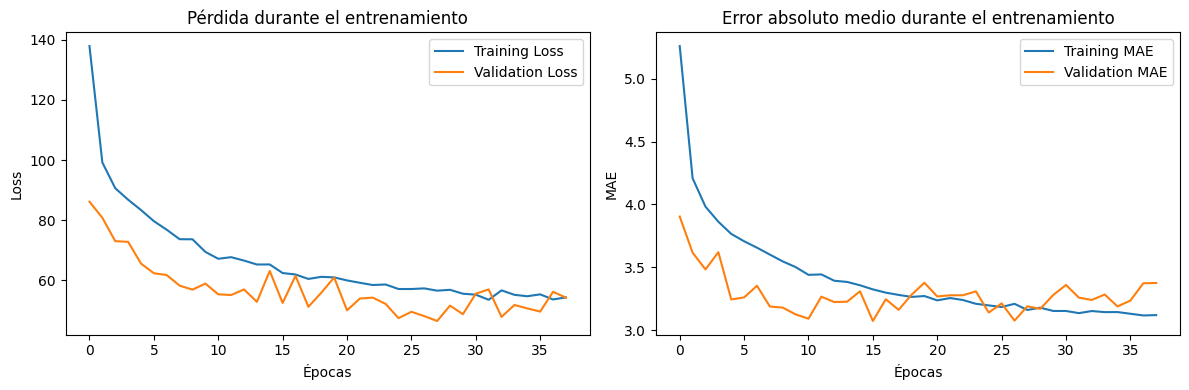

In [ ]:
# Graficar la pérdida y el MAE de entrenamiento y validación
plt.figure(figsize=(12, 4))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico de MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

540/540 [==============================] - 1s 1ms/step


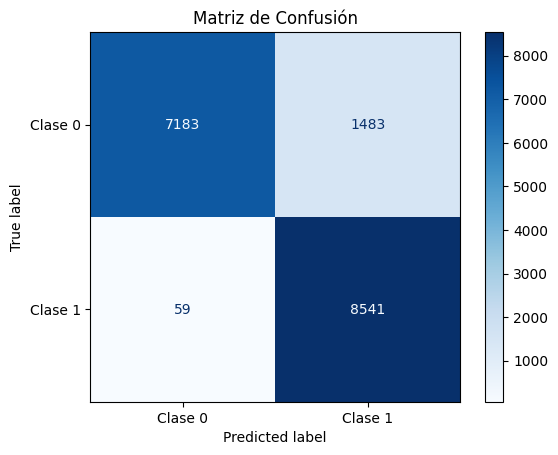

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.99      0.83      0.90      8666
     Clase 1       0.85      0.99      0.92      8600

    accuracy                           0.91     17266
   macro avg       0.92      0.91      0.91     17266
weighted avg       0.92      0.91      0.91     17266



In [ ]:
# Predicción en el conjunto de validación
y_pred = model.predict(X_val)

# Convertir a un problema de clasificación binaria para la matriz de confusión
# Usamos la mediana de y_train como umbral
threshold = np.median(y_train)
y_pred_classes = (y_pred >= threshold).astype(int).flatten()
y_val_classes = (y_val >= threshold).astype(int)

# Matriz de confusión
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Clase 0", "Clase 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_val_classes, y_pred_classes, target_names=["Clase 0", "Clase 1"]))

84/84 [==============================] - 0s 1ms/step


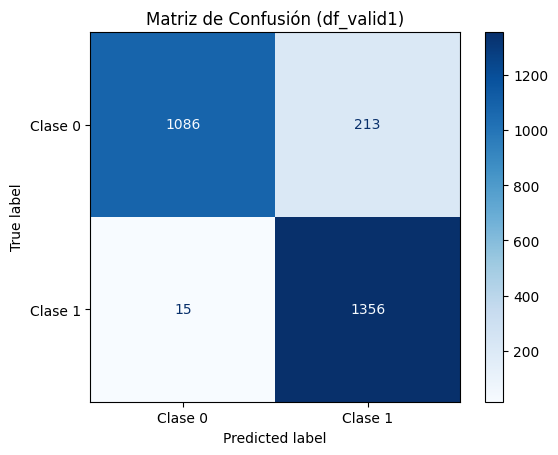

Reporte de Clasificación (df_valid1):
              precision    recall  f1-score   support

     Clase 0       0.99      0.84      0.91      1299
     Clase 1       0.86      0.99      0.92      1371

    accuracy                           0.91      2670
   macro avg       0.93      0.91      0.91      2670
weighted avg       0.92      0.91      0.91      2670


Métricas en el conjunto de validación (df_valid1):
- Loss: 40.6965
- MAE: 3.1097


In [ ]:
# Transformar el conjunto de validación df_valid1
X_test = preprocessor.transform(df_valid1.drop(columns=['DeathRatePer100K']))
y_test = df_valid1['DeathRatePer100K']

# Evaluar el modelo en el conjunto de validación
y_test_pred = model.predict(X_test)

# Convertir las predicciones y valores reales a clases binarias
# Usamos la mediana de y_train como umbral
threshold = np.median(y_train)
y_test_pred_classes = (y_test_pred >= threshold).astype(int).flatten()
y_test_classes = (y_test >= threshold).astype(int)

# Calcular y mostrar métricas de rendimiento
conf_matrix_test = confusion_matrix(y_test_classes, y_test_pred_classes)

# Mostrar la matriz de confusión
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["Clase 0", "Clase 1"])
disp_test.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (df_valid1)")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación (df_valid1):")
print(classification_report(y_test_classes, y_test_pred_classes, target_names=["Clase 0", "Clase 1"]))

# Calcular la pérdida y otras métricas en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print("\nMétricas en el conjunto de validación (df_valid1):")
print(f"- Loss: {test_loss:.4f}")
print(f"- MAE: {test_mae:.4f}")


### Modelo anterior utilizando outliers reemplazados por la mediana

In [ ]:
# Separar las variables dependientes e independientes del dataframe df_modNer
X = df_modNer2.drop(columns=['DeathRatePer100K'])  # Variables independientes
y = df_modNer2['DeathRatePer100K']                 # Variable dependiente

# Dividir el conjunto en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocesamiento
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)  # Convertir a formato denso
    ]
)

# Ajustar el preprocesador y transformar los datos
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Convertir y_train y y_val a formato adecuado (si son series de pandas)
y_train = y_train.values
y_val = y_val.values

# Crear el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience=10,         # Detener después de 10 épocas sin mejora
    restore_best_weights=True  # Restaurar los pesos del mejor modelo
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Número máximo de épocas
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Agregar Early Stopping
)

# Realizar predicciones de probabilidad para el modelo con medias
y_pred2 = model.predict(X_val)

# Calcular la curva ROC
fpr2, tpr2, _ = roc_curve(y_val > median_value, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

Epoch 1/100
2159/2159 [==============================] - 7s 2ms/step - loss: 38.0785 - mae: 3.7823 - val_loss: 28.1443 - val_mae: 3.1400
Epoch 2/100
2159/2159 [==============================] - 5s 2ms/step - loss: 28.1125 - mae: 3.0354 - val_loss: 24.3549 - val_mae: 2.6665
Epoch 3/100
2159/2159 [==============================] - 6s 3ms/step - loss: 25.1758 - mae: 2.7901 - val_loss: 23.8694 - val_mae: 2.5486
Epoch 4/100
2159/2159 [==============================] - 5s 2ms/step - loss: 23.9717 - mae: 2.6849 - val_loss: 21.6530 - val_mae: 2.4350
Epoch 5/100
2159/2159 [==============================] - 5s 2ms/step - loss: 22.9901 - mae: 2.5942 - val_loss: 21.4184 - val_mae: 2.3303
Epoch 6/100
2159/2159 [==============================] - 6s 3ms/step - loss: 22.2183 - mae: 2.5309 - val_loss: 21.6572 - val_mae: 2.3753
Epoch 7/100
2159/2159 [==============================] - 5s 2ms/step - loss: 21.5102 - mae: 2.4696 - val_loss: 20.4993 - val_mae: 2.3542
Epoch 8/100
2159/2159 [==================

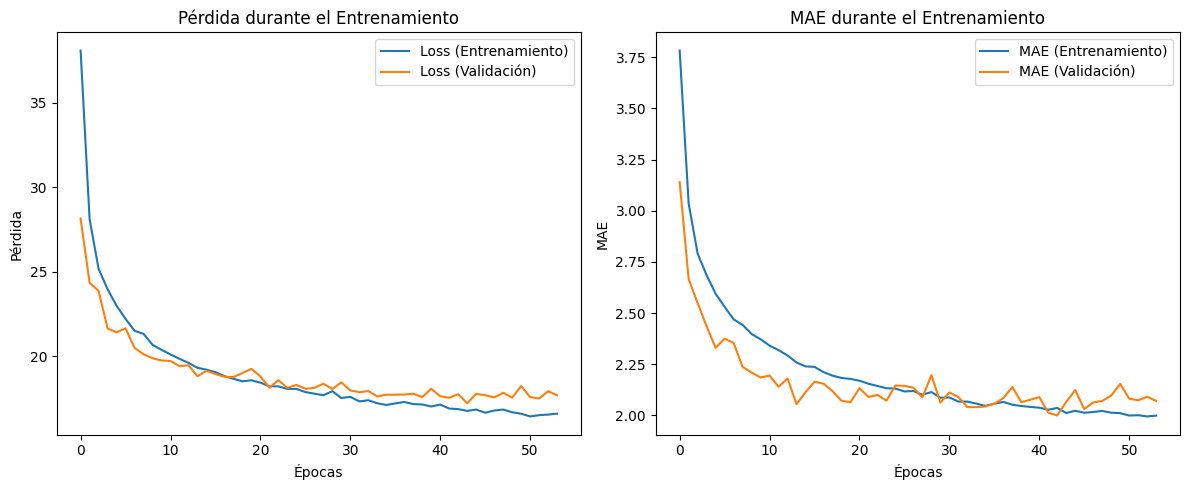

540/540 [==============================] - 1s 1ms/step


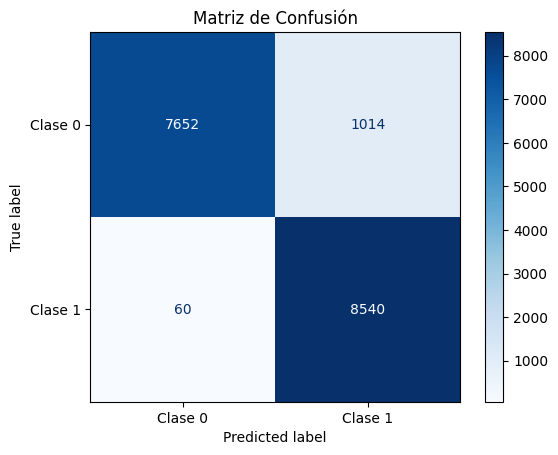

Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.99      0.88      0.93      8666
     Clase 1       0.89      0.99      0.94      8600

    accuracy                           0.94     17266
   macro avg       0.94      0.94      0.94     17266
weighted avg       0.94      0.94      0.94     17266



In [ ]:
# Graficar métricas de entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (Validación)')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico del MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE (Entrenamiento)')
plt.plot(history.history['val_mae'], label='MAE (Validación)')
plt.title('MAE durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Predicción en el conjunto de validación
y_pred = model.predict(X_val)

# Convertir a un problema de clasificación binaria para la matriz de confusión
# Usamos la mediana de y_train como umbral
threshold = np.median(y_train)
y_pred_classes = (y_pred >= threshold).astype(int).flatten()
y_val_classes = (y_val >= threshold).astype(int)

# Matriz de confusión
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Clase 0", "Clase 1"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_val_classes, y_pred_classes, target_names=["Clase 0", "Clase 1"]))

### Evaluación del modelo

84/84 [==============================] - 0s 1ms/step


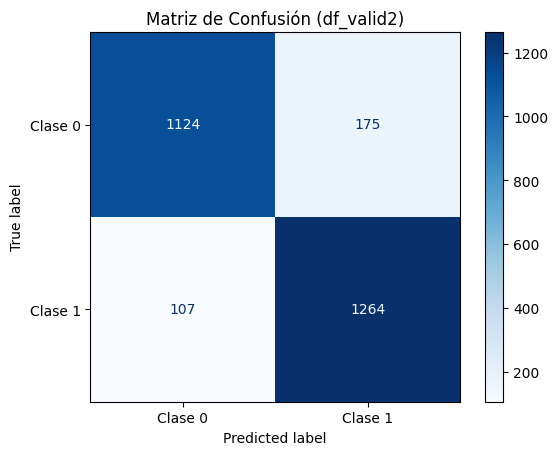

Reporte de Clasificación (df_valid2):
              precision    recall  f1-score   support

     Clase 0       0.91      0.87      0.89      1299
     Clase 1       0.88      0.92      0.90      1371

    accuracy                           0.89      2670
   macro avg       0.90      0.89      0.89      2670
weighted avg       0.90      0.89      0.89      2670


Métricas en el conjunto de validación (df_valid2):
- Loss: 101.6673
- MAE: 3.5132


In [ ]:
# Transformar el conjunto de validación df_valid2
X_test = preprocessor.transform(df_valid1.drop(columns=['DeathRatePer100K']))
y_test = df_valid2['DeathRatePer100K']

# Evaluar el modelo en el conjunto de validación
y_test_pred = model.predict(X_test)

# Convertir las predicciones y valores reales a clases binarias
# Usamos la mediana de y_train como umbral
threshold = np.median(y_train)
y_test_pred_classes = (y_test_pred >= threshold).astype(int).flatten()
y_test_classes = (y_test >= threshold).astype(int)

# Calcular y mostrar métricas de rendimiento
conf_matrix_test = confusion_matrix(y_test_classes, y_test_pred_classes)

# Mostrar la matriz de confusión
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["Clase 0", "Clase 1"])
disp_test.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (df_valid2)")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación (df_valid2):")
print(classification_report(y_test_classes, y_test_pred_classes, target_names=["Clase 0", "Clase 1"]))

# Calcular la pérdida y otras métricas en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print("\nMétricas en el conjunto de validación (df_valid2):")
print(f"- Loss: {test_loss:.4f}")
print(f"- MAE: {test_mae:.4f}")

## Modelo red neuronal de clasificación binaria usando outliers reemplazados por la media

In [ ]:
# Separar las variables dependientes e independientes del dataframe df_modNer
X = df_modNer2.drop(columns=['DeathRatePer100K'])  # Variables independientes
y = df_modNer2['DeathRatePer100K']                 # Variable dependiente

# Convertir y en 0 (bajo la media) y 1 (sobre la media)
median_value = 4.73
y_binary = (y > median_value).astype(int)

# Dividir el conjunto en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Preprocesamiento
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)  # Convertir a formato denso
    ]
)

# Ajustar el preprocesador y transformar los datos
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Crear el modelo de red neuronal para clasificación binaria
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience=5,         # Detener después de 5 épocas sin mejora
    restore_best_weights=True  # Restaurar los pesos del mejor modelo
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Número máximo de épocas
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Agregar Early Stopping
)

# Realizar predicciones de probabilidad para el modelo binario
y_pred3 = model.predict(X_val)

# Calcular la curva ROC
fpr3, tpr3, _ = roc_curve(y_val, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

Epoch 1/100
2159/2159 [==============================] - 7s 3ms/step - loss: 0.2068 - accuracy: 0.9144 - val_loss: 0.1245 - val_accuracy: 0.9494
Epoch 2/100
2159/2159 [==============================] - 7s 3ms/step - loss: 0.1295 - accuracy: 0.9474 - val_loss: 0.0948 - val_accuracy: 0.9617
Epoch 3/100
2159/2159 [==============================] - 7s 3ms/step - loss: 0.1064 - accuracy: 0.9569 - val_loss: 0.0787 - val_accuracy: 0.9687
Epoch 4/100
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0951 - accuracy: 0.9608 - val_loss: 0.0775 - val_accuracy: 0.9684
Epoch 5/100
2159/2159 [==============================] - 7s 3ms/step - loss: 0.0886 - accuracy: 0.9632 - val_loss: 0.0672 - val_accuracy: 0.9726
Epoch 6/100
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0845 - accuracy: 0.9648 - val_loss: 0.0726 - val_accuracy: 0.9708
Epoch 7/100
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0812 - accuracy: 0.9658 - val_loss: 0.0664 - val_ac

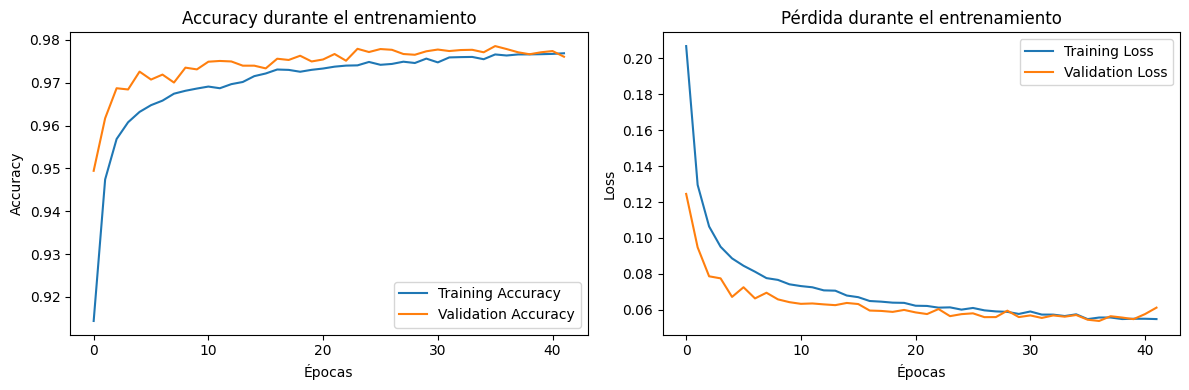

In [ ]:
# Graficar la precisión y la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 4))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

540/540 [==============================] - 1s 1ms/step
                  precision    recall  f1-score   support

 bajo la mediana       0.97      0.98      0.98      8666
sobre la mediana       0.98      0.97      0.98      8600

        accuracy                           0.98     17266
       macro avg       0.98      0.98      0.98     17266
    weighted avg       0.98      0.98      0.98     17266



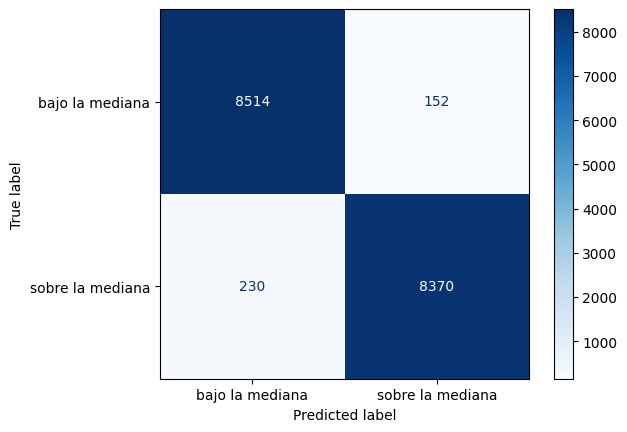

In [ ]:
# Realizar las predicciones
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

# Mostrar el reporte de clasificación
print(classification_report(y_val, y_pred, target_names=["bajo la mediana", "sobre la mediana"]))

# Generar la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["bajo la mediana", "sobre la mediana"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Evaluación general de los modelos

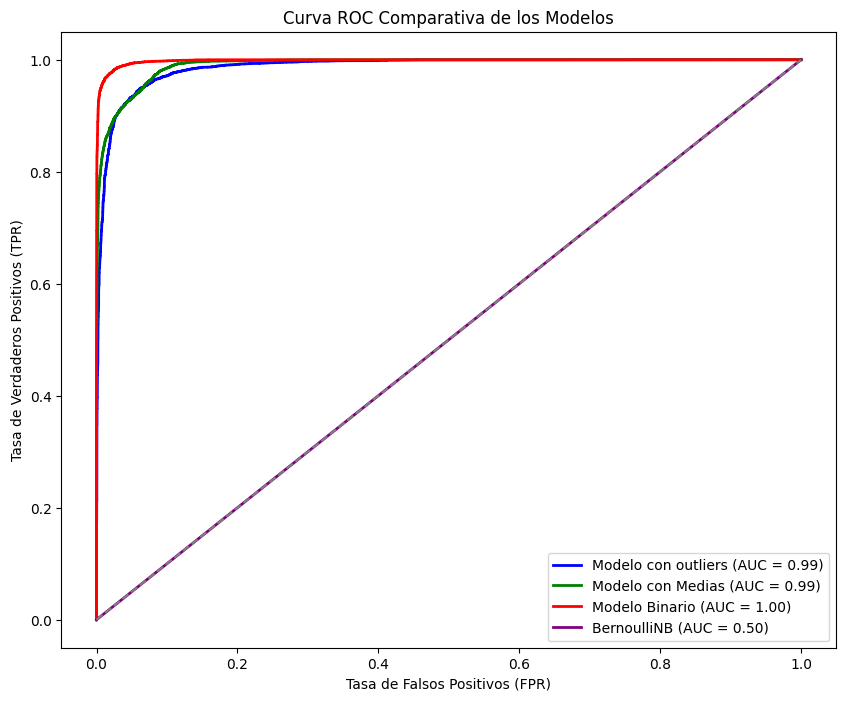

In [ ]:
# --- Graficar la Curva ROC para el modelo BernoulliNB junto a los otros modelos ---

plt.figure(figsize=(10, 8))

# Modelo con outliers (original)
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Modelo con outliers (AUC = {roc_auc1:.2f})')

# Modelo con outliers reemplazados por sus medias
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Modelo con Medias (AUC = {roc_auc2:.2f})')

# Modelo de clasificación binaria
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'Modelo Binario (AUC = {roc_auc3:.2f})')

# Modelo BernoulliNB
plt.plot(fpr_bayes, tpr_bayes, color='purple', lw=2, label=f'BernoulliNB (AUC = {roc_auc_bayes:.2f})')

# Línea diagonal (representando un clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Título y etiquetas
plt.title('Curva ROC Comparativa de los Modelos')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()